# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv("./Datasets/data.csv")

In [3]:
df.drop(['Unnamed: 32'], axis = 'columns',inplace=True)

# Data Pre-Processing

In [4]:
dummy = pd.get_dummies(df['diagnosis'])
#Concatenates the new dummy columns to the original dataframe
df = pd.concat((df, dummy), axis = 'columns')
#Re-names the columns that were just concatenated
df.rename(columns={'M':'Malignant', 'B': 'Benign'}, inplace=True)
#We will use "Malignant" as our label column, 1 indicating Breast Cancer positive, and 0 vice versa
df.drop(['diagnosis','Benign'], axis = 'columns',inplace=True)

In [5]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Malignant
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [6]:
df.shape

(569, 32)

# Data Preparation for Model Training

In [7]:
from sklearn.model_selection import train_test_split

#function to separate our inputs and outputs and randomizes their observations
def split_data (features, labels, test_percent):
    X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=test_percent, random_state=42)
    return X_train, X_test, Y_train, Y_test

In [8]:
# Separate Dataset
X,Y = df.iloc[:,:-1], df.iloc[:,-1:]
X_train, X_test, Y_train, Y_test = split_data(X,Y,0.2)

In [9]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(455, 31)
(455, 1)
(114, 31)
(114, 1)


Convert to numpy array before feeding to model

In [10]:
X_train = X_train.to_numpy(dtype='float32')
Y_train = Y_train.to_numpy(dtype='float32')

X_test = X_test.to_numpy(dtype='float32')
Y_test = Y_test.to_numpy(dtype='float32')

# Linear SVM Classification model 

SVMs are sensitive to the feature scales, so feauture scaling is recommended

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

svm_lin = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel='linear', C=1.0, random_state=1))
])

svm_lin.fit(X_train, Y_train.ravel())

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(kernel='linear', random_state=1))])

The "C" hyperparameter specifies the number of desired margin violations. The larger the "C" the less margin violations but less generalization to unseen data

# Kernel SVM's

The basic idea behind kernel methods for dealing with such linearly inseparable data is to create nonlinear combinations of the original features to project them onto a higher-dimensional space via a mapping function ϕ, where the data becomes linearly separable

To solve the nonlinear problem using an SVM, we would transform the training data into a higher-dimensional feature space via a mapping function, and train a linear SVM model to classify the data in this new feature space. Then we could use the same mapping function to transform the new, unseen data to classify it using the linear SVM model. Because this is very computationally expensive a "kernel trick" is used

### Polynomial Kernel

In [12]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=1, C=5.0, random_state=1))
])

poly_kernel_svm_clf.fit(X_train, Y_train.ravel())

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=5.0, coef0=1, degree=2, kernel='poly', random_state=1))])

The greater the degree the more the model will overfit. The parameter "coef0" controls how much the model is influenced by high-degree polynomials versus low-degree polynomials

### Gaussian RBF Kernel

In [13]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = 'rbf', gamma = 0.10, C = 10.0, random_state = 1))
])

rbf_kernel_svm_clf.fit(X_train, Y_train.ravel())

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=10.0, gamma=0.1, random_state=1))])

The gamma hyperparameter acts as a cut-off parameter for the Gaussian sphere. If its increased, we increase the influence or reach of the training examples, which leads to a tigher and bumpier decision boundary. The higher the greater the generalization error on unseen data

### Sigmoid Kernel

In [14]:
sig_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = 'sigmoid', coef0 = 1.0, gamma = 0.1, C = 1.0, random_state = 1))
])

sig_kernel_svm_clf.fit(X_train, Y_train.ravel())

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(coef0=1.0, gamma=0.1, kernel='sigmoid', random_state=1))])

Gamma works the same as in RBF, and the "coef0" acts as the "r" parameter in the sigmoid kernel function doesn't have a very clear visual effect with small changes; the effect of the "r" is to shift the hyperbolic tangent.

The higher positive and negative values for the 𝑟 constant dominates the result, it makes it harder for the scalar product to have an impact on the result of the function.

# SVM Predictions & Evaluations

In [15]:
y_pred_lin = svm_lin.predict(X_test)
y_pred_poly = poly_kernel_svm_clf.predict(X_test)
y_pred_rbf = rbf_kernel_svm_clf.predict(X_test)
y_pred_sig = sig_kernel_svm_clf.predict(X_test)

# Evaluation Metrics

### Linear

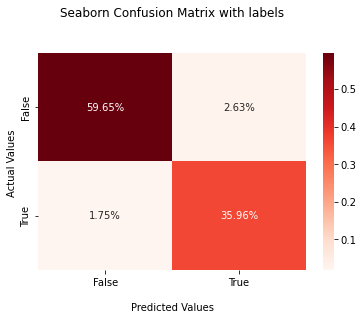

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96        71
         1.0       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193


In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Linear SVM
cf_matrix = confusion_matrix(Y_test,y_pred_lin)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(Y_test,y_pred_lin))
print(accuracy_score(Y_test,y_pred_lin))

### Polynomial

In [17]:
print(confusion_matrix(Y_test,y_pred_poly))
print(classification_report(Y_test,y_pred_poly))
print(accuracy_score(Y_test,y_pred_poly))

[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        71
         1.0       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

0.9736842105263158


### Gaussian RBF

In [18]:
print(confusion_matrix(Y_test,y_pred_rbf))
print(classification_report(Y_test,y_pred_rbf))
print(accuracy_score(Y_test,y_pred_rbf))

[[69  2]
 [ 2 41]]
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        71
         1.0       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

0.9649122807017544


### Sigmoid

In [19]:
print(confusion_matrix(Y_test,y_pred_sig))
print(classification_report(Y_test,y_pred_sig))
print(accuracy_score(Y_test,y_pred_sig))

[[67  4]
 [ 5 38]]
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94        71
         1.0       0.90      0.88      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114

0.9210526315789473
